In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use(
    "https://github.com/mlefkir/beauxgraphs/raw/main/beautifulgraphs_colblind.mplstyle"
)

In [2]:
n_samples = [50, 100, 200, 500, 800, 1_000, 2_000, 5_000, 10_000, 20_000, 50_000, 100_000]
n_components = [10, 20, 25, 30, 40, 50]

In [3]:
julia_benchmarks = np.genfromtxt("../../Pioran.jl/benchmark/median_time.txt")
python_benchmarks = np.genfromtxt("benchmark_cpu.txt")[1:,:]
python_fft_benchmarks = np.genfromtxt("benchmark_cpu_direct.txt")

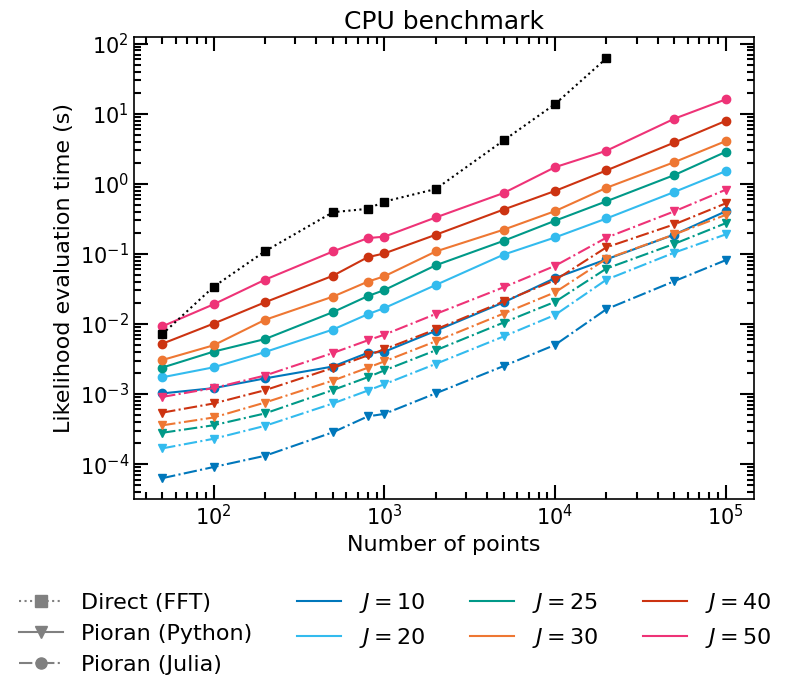

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
for j, J in enumerate(n_components):
    ax.plot(
        n_samples,
        python_benchmarks.T[j],
        # mfc="w",
        label=f"Python, J={J}",
        ls="-",
        marker="o",
        color=f"C{j}",
    )
    ax.plot(
        n_samples,
        julia_benchmarks.T[j],
        label=f"Julia, J={J}",
        marker="v",
        color=f"C{j}",
        linestyle="-.",
        # mfc="w",
    )
ax.plot(
    python_fft_benchmarks[0],
    python_fft_benchmarks[1],
    label="FFT",
    marker="s",
    color="k",
    ls=":",
)
ax.update(
    {
        "xscale": "log",
        "yscale": "log",
        "xlabel": "Number of points",
        "ylabel": "Likelihood evaluation time (s)",
        "title": "CPU benchmark",
    }
)

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="grey", marker="s", ls=":", label="Direct (FFT)", ms=8),
    Line2D([0], [0], color="grey", marker="v", ls="-", label="Pioran (Python)", ms=8),
    Line2D([0], [0], color="grey", marker="o", ls="-.", label="Pioran (Julia)", ms=8)] + [
    Line2D([0], [0], color=f"C{i}", label=rf"$J={J}$", ms=8)
    for i, J in enumerate(n_components)]
    
ax.legend(
    handles=legend_elements,
    bbox_to_anchor=(-0.2, -0.4),
    loc="lower left",
    borderaxespad=0.0,
    ncols=4,
)
fig.savefig(f"all_benchmark.pdf", bbox_inches="tight")